In [ ]:
MONTECARLO PARA CALCULO DO TIR DE CADA PROJETO


Média da TIR: 14.59%
% de TIR < 10%: 0.00%
% de projetos com TIR inválida: 0.00%


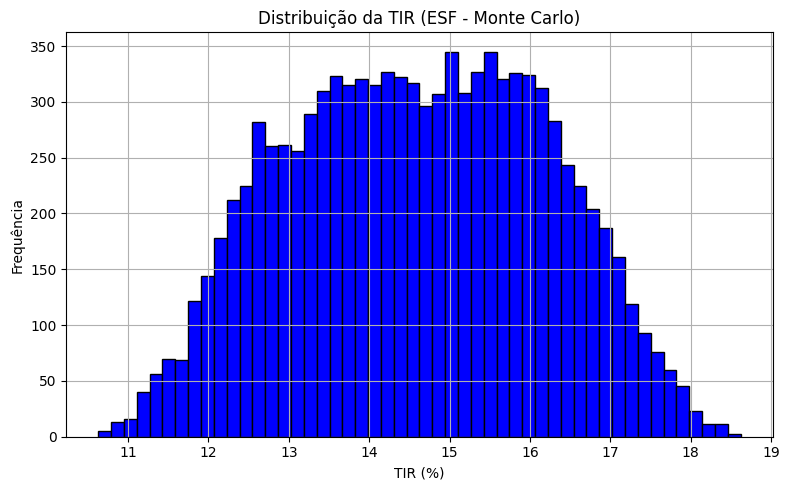

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parâmetros Gerais ---
anos = 15
n_simulacoes = 10000

# Intervalos de incerteza
selic_range = (12.0484, 12.2516)                # Anual, em %
ipca_mensal_range = (0.4127, 0.4873)            # Mensal, em %

# Parâmetros do projeto ESF
preco_range = (135.58, 168.82)                  # R$/MWh
eficiencia_range = (0.24, 0.26)                 # Proporção (25%)
custo_var_range = (5, 15)                       # R$/MWh

capacidade_mwh = 2500                           # MWh
custo_fixo = 5000                               # R$/ano
investimento_inicial = 500000                   # R$

# --- Função de Cálculo do VPL com taxa genérica ---
def calcular_vpl(fluxos, taxa):
    return sum([fc / ((1 + taxa) ** t) for t, fc in enumerate(fluxos)])

# --- Função de Cálculo da TIR (busca binária) ---
def calcular_tir(fluxos, tol=1e-5, max_iter=100):
    taxa_baixa = -0.99  # TIR mínima admissível
    taxa_alta = 1.0     # TIR máxima (100% a.a.)
    for _ in range(max_iter):
        taxa_media = (taxa_baixa + taxa_alta) / 2
        vpl = calcular_vpl(fluxos, taxa_media)
        if abs(vpl) < tol:
            return taxa_media
        elif vpl > 0:
            taxa_baixa = taxa_media
        else:
            taxa_alta = taxa_media
    return np.nan  # não convergiu

# --- Simulação Monte Carlo ---
tirs = []

for _ in range(n_simulacoes):
    preco = np.random.uniform(*preco_range)
    eficiencia = np.random.uniform(*eficiencia_range)
    custo_var = np.random.uniform(*custo_var_range)

    receita = preco * capacidade_mwh * eficiencia
    custo_total = custo_var * capacidade_mwh * eficiencia + custo_fixo
    fluxo = receita - custo_total

    fluxos = [-investimento_inicial] + [fluxo] * anos
    tir = calcular_tir(fluxos)
    tirs.append(tir)

tirs = np.array(tirs)

# --- Resultados ---
print(f"Média da TIR: {np.nanmean(tirs) * 100:.2f}%")
print(f"% de TIR < 10%: {(np.sum(tirs < 0.10) / n_simulacoes) * 100:.2f}%")
print(f"% de projetos com TIR inválida: {(np.sum(np.isnan(tirs)) / n_simulacoes) * 100:.2f}%")

# --- Gráfico ---
plt.figure(figsize=(8, 5))
plt.hist(tirs[~np.isnan(tirs)] * 100, bins=50, color='blue', edgecolor='black')
plt.title('Distribuição da TIR (ESF - Monte Carlo)')
plt.xlabel('TIR (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


Média da TIR: 2.95%
% de TIR < 10%: 100.00%
% de projetos com TIR inválida: 0.00%


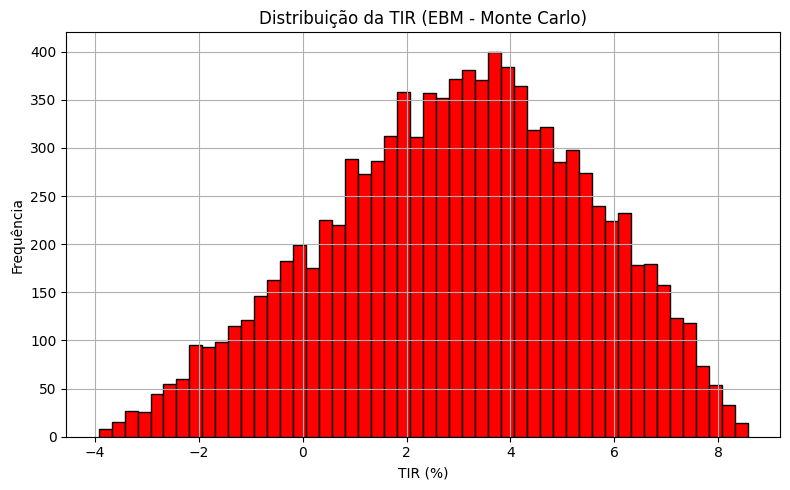

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parâmetros Gerais ---
anos = 15
n_simulacoes = 10000

# Intervalos de incerteza
selic_range = (12.0484, 12.2516)                # Anual, em %
ipca_mensal_range = (0.4127, 0.4873)            # Mensal, em %

# Parâmetros do projeto EBM
preco_range = (147.88, 183.70)
eficiencia_range = (0.84, 0.86)
custo_var_range = (30, 80)
capacidade_mwh = 1000
custo_fixo = 10000
investimento_inicial = 1000000

# --- Função de Cálculo do VPL com taxa genérica ---
def calcular_vpl(fluxos, taxa):
    return sum([fc / ((1 + taxa) ** t) for t, fc in enumerate(fluxos)])

# --- Função de Cálculo da TIR (busca binária) ---
def calcular_tir(fluxos, tol=1e-5, max_iter=100):
    taxa_baixa = -0.99  # TIR mínima admissível
    taxa_alta = 1.0     # TIR máxima (100% a.a.)
    for _ in range(max_iter):
        taxa_media = (taxa_baixa + taxa_alta) / 2
        vpl = calcular_vpl(fluxos, taxa_media)
        if abs(vpl) < tol:
            return taxa_media
        elif vpl > 0:
            taxa_baixa = taxa_media
        else:
            taxa_alta = taxa_media
    return np.nan  # não convergiu

# --- Simulação Monte Carlo ---
tirs = []

for _ in range(n_simulacoes):
    preco = np.random.uniform(*preco_range)
    eficiencia = np.random.uniform(*eficiencia_range)
    custo_var = np.random.uniform(*custo_var_range)

    receita = preco * capacidade_mwh * eficiencia
    custo_total = custo_var * capacidade_mwh * eficiencia + custo_fixo
    fluxo = receita - custo_total

    fluxos = [-investimento_inicial] + [fluxo] * anos
    tir = calcular_tir(fluxos)
    tirs.append(tir)

tirs = np.array(tirs)

# --- Resultados ---
print(f"Média da TIR: {np.nanmean(tirs) * 100:.2f}%")
print(f"% de TIR < 10%: {(np.sum(tirs < 0.10) / n_simulacoes) * 100:.2f}%")
print(f"% de projetos com TIR inválida: {(np.sum(np.isnan(tirs)) / n_simulacoes) * 100:.2f}%")

# --- Gráfico ---
plt.figure(figsize=(8, 5))
plt.hist(tirs[~np.isnan(tirs)] * 100, bins=50, color='red', edgecolor='black')
plt.title('Distribuição da TIR (EBM - Monte Carlo)')
plt.xlabel('TIR (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()
